# **Newton-Raphson Method**
I want to try to write a simple python algorithm for the **Newton-Raphson method** for simple cases, reaching **convergence** for the **first 6 decimal places**.

The common formula of Newton-Raphson is the following:

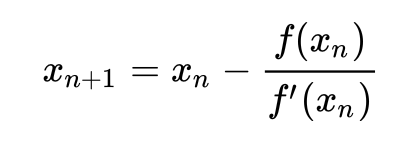

Here are some basic facts about this method from Wikipedia (https://en.wikipedia.org/wiki/Newton%27s_method):

- In **Numerical Analysis**, the **Newton-Raphson method** (or **Newton's method**) is a **root-finding algorithm** that produces **successively better approximations** of the **roots** of a **real-valued function**.
- The idea is to **start with an initial guess near a root**, **approximate the function by its tangent line near the guess** and then **take the root of the linear approximation as a next guess** at the function's root. This will be **typically closer** to the function's root than the previous guess and the method can be **iterated**.

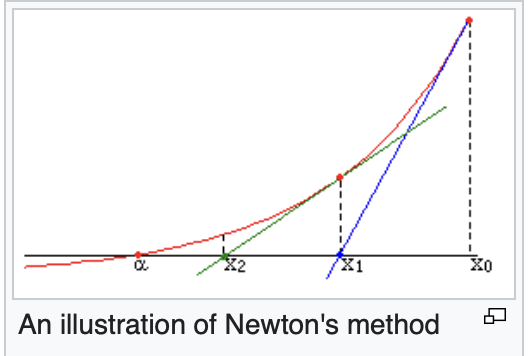


Example case: Use Newton–Raphson to find the single real root of $e^x = 3x$ correct to 6 decimal places

In [ ]:
import numpy as np

In [ ]:
# function explicitly rewritten
x = 3
y = 3*x - np.exp(x)
y

In [ ]:
# derivative of function manually extracted
y_prime = 3 - np.exp(x)
y_prime

In [ ]:
import numpy as np
def newton_raphson_explicitly_coded(x0, tolerance, max_iterations):
    '''
    Args:
    x0: initial root's guess
    
    tolerance: the minimum difference between two consecutively calculated root approximations required to stop   the algorithm
    
    max_iterations: maximum number of algorithm's iteration allowed
    '''
    tolerance_decimal = 10**(-tolerance)
    for i in range(max_iterations):
        print("*****************")
        print(f"Iteration {i+1}")
        print(f"x_{i}= {x0}")
        y = 3*x0 - np.exp(x0)
        y_prime = 3 - np.exp(x0)
        x1 = x0 - (y/y_prime)
        diff = abs(x1-x0)
        print(f"f(x_{i}) = {y}")
        print(f"f'(x_{i}) = {y_prime}")
        print(f"x_{i+1} = {x1}")
        print(f"diff x_{i+1} - x_{i} = {diff}")
        if (diff < tolerance_decimal):
            x1 = round(x1, tolerance)
            print("*****************")
            print(f"After {i+1} iterations, the method has converged to: {x1}")
            return (x1)
        x0 = x1
    print(f"After {i+1} iterations, the method did not converge")
    return None

In [ ]:
## ROOT 1
newton_raphson_explicitly_coded(x0= 0.5, tolerance =6, max_iterations= 100)

In [ ]:
## ROOT 2
newton_raphson_explicitly_coded(x0= 2, tolerance =6, max_iterations= 100)

The one above is a simple algorithm for the method for an explicitly coded function and its calculated derivative. I would like to find a way to have python calculating the derivative automatically for simple cases. I will need to add y as a parameter of the function and use a python library that can calculate derivatives.

Test **simpy library**: https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

In [ ]:
import sympy as sp

In [ ]:
x, y = sp.symbols('x y')
y = 3*x - sp.exp(x)
y_diff = sp.diff(y, x)
y_diff 

In [ ]:
y
y.evalf(subs={x:2})

In [ ]:
y_diff.evalf(subs={x: 2})

In [ ]:
import numpy as np
import sympy as sym
def newton_raphson_sympy(x0, y, tolerance, max_iterations):
    '''
    Args:
    x0: initial root's guess

    y: the equation expression converted into sympy format
    
    tolerance: the minimum difference between two consecutively calculated root approximations required to stop   the algorithm
    
    max_iterations: maximum number of algorithm's iteration allowed
    '''
    print(f"f(x) is {y}")
    y_prime = sp.diff(y, x)
    print(f"f'(x) is {y_prime}")
    tolerance_decimal = 10**(-tolerance)
    for i in range(max_iterations):
        print("*****************")
        print(f"Iteration {i+1}")
        print(f"x_{i}= {x0}")
        y_eval = y.evalf(subs={x:x0})
        # y = 3*x0 - np.exp(x0)
        y_prime_eval = y_prime.evalf(subs={x:x0})
        #y_prime = 3 - np.exp(x0)
        x1 = x0 - (y_eval/y_prime_eval)
        diff = abs(x1-x0)
        print(f"f(x_{i}) = {y_eval}")
        print(f"f'(x_{i}) = {y_prime_eval}")
        print(f"x_{i+1} = {x1}")
        print(f"diff x_{i+1} - x_{i} = {diff}")
        if (diff < tolerance_decimal):
            x1 = round(x1, tolerance+3)
            print("*****************")
            print(f"After {i+1} iterations, the method has converged to: {x1}")
            return (x1)
        x0 = x1
    print(f"After {i+1} iterations, the method did not converge")
    return None

In [ ]:
x, y = sp.symbols('x y')
y = 3*x - sp.exp(x)
newton_raphson_sympy(x0= 0.5, y = y, tolerance =6, max_iterations= 100)

In [ ]:
x, y = sp.symbols('x y')
y = x**2 - 7
newton_raphson_sympy(x0= 2, y = y, tolerance =6, max_iterations= 100)

In [ ]:
x, y = sym.symbols('x y')
y = sym.cos(x)
newton_raphson_sympy(x0= 2, y = y, tolerance =6, max_iterations= 100)

Solve 𝑥^3 − 2𝑥 − 5 = 0 to 3 decimal places

In [ ]:
x, y = sym.symbols('x y')
y = x**3 - 2*x - 5
newton_raphson_sympy(x0= 2, y = y, tolerance =3, max_iterations= 100)

Trying to embed the function in a package

In [ ]:
import newton_raphson
newton_raphson

In [ ]:
newton_raphson.main

In [ ]:
print(f"The value of __name__ is: {repr(newton_raphson.__name__)}")

In [2]:
import sympy as sym
import importlib
import newton_raphson
importlib.reload(newton_raphson)  # Reload the module to get the fixed version

x, y = sym.symbols('x y')
y = 3*x - sym.exp(x)
newton_raphson.main(x0= 0.5, y = y, tolerance =6, max_iterations= 100)

f(x) is 3*x - exp(x)
f'(x) is 3 - exp(x)
*****************
Iteration 1
x_0= 0.5
f(x_0) = -0.148721270700128
f'(x_0) = 1.35127872929987
x_1 = 0.610059654958962
diff x_1 - x_0 = 0.110059654958962
*****************
Iteration 2
x_1= 0.610059654958962
f(x_1) = -0.0103622280391682
f'(x_1) = 1.15945880708395
x_2 = 0.618996779741540
diff x_2 - x_1 = 0.00893712478257791
*****************
Iteration 3
x_2= 0.618996779741540
f(x_2) = -0.0000737234982654207
f'(x_2) = 1.14293593727712
x_3 = 0.619061283355313
diff x_3 - x_2 = 0.0000645036137729704
*****************
Iteration 4
x_3= 0.619061283355313
f(x_3) = -3.86344137345864E-9
f'(x_3) = 1.14281614607062
x_4 = 0.619061286735945
diff x_4 - x_3 = 3.38063244065268E-9
*****************
After 4 iterations, the method has converged to: 0.619061287


0.619061287

In [4]:
x, y = sym.symbols('x y')
y = x**3 - 2*x - 5
newton_raphson.main(x0= 2, y = y, tolerance =3, max_iterations= 100)

f(x) is x**3 - 2*x - 5
f'(x) is 3*x**2 - 2
*****************
Iteration 1
x_0= 2
f(x_0) = -1.00000000000000
f'(x_0) = 10.0000000000000
x_1 = 2.10000000000000
diff x_1 - x_0 = 0.100000000000000
*****************
Iteration 2
x_1= 2.10000000000000
f(x_1) = 0.0610000000000010
f'(x_1) = 11.2300000000000
x_2 = 2.09456812110419
diff x_2 - x_1 = 0.00543187889581498
*****************
Iteration 3
x_2= 2.09456812110419
f(x_2) = 0.000185723173271540
f'(x_2) = 11.1616468418377
x_3 = 2.09455148169820
diff x_3 - x_2 = 0.0000166394059859520
*****************
After 3 iterations, the method has converged to: 2.094551


2.094551